## Social Ads Click Classification

This data set contains the following features:

1) 'User ID': unique identification for consumer

2) 'Age': cutomer age in years

3) 'Estimated Salary': Avg. Income of consumer

4) 'Gender': Whether consumer was male or female

5) 'Purchased': 0 or 1 indicated clicking on Ad

Dalam Notebook ini, saya akan membuat analisis tentang iklan yang muncul di media sosial dengan menggunakan fitur-fitur diatas, apakah orang yang sedang berada di social media akan membuka iklan tersebut atau tidak.

Dalam dunia sosial media seperti sekarang, dimana orang-orang sudah mencari hiburan, pertemanan, bisnis melalu platform ini. Tentunya, hal ini merubah cara pandang para pekerja sales atau bagian marketing dalam memasarkan produknya. Tentunya dengan social media bisa memberikan keuntungan tersendiri, mengurangi biaya brosur cetak, mengurangi pekerja pemasaran dan macam lainnya. Tentunya dari analisis akan bisa dilihat bagaimana pola yang terjadi seperti bagaimana gender, gaji dan juga umur bisa memperlihatkan bagaimana klasifikasi yang terjadi

In [2]:
# Import Modul yang dibutuhkan
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.express as px
import missingno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [3]:
# Import Dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Melihat informasi di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [6]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,User ID,int64,0,0.0,400,"[15718071, 15733964, 15749130]",100.00
1,Gender,object,0,0.0,2,[Female],0.50
2,Age,int64,0,0.0,43,"[52, 26, 47]",10.75
3,EstimatedSalary,int64,0,0.0,117,"[89000, 57000, 106000]",29.25
4,Purchased,int64,0,0.0,2,"[1, 0]",0.50


In [7]:
# Drop kolom User ID
df.drop(columns=['User ID'], inplace=True)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
# Cek apakah ada data duplikasi
df.duplicated().any()

True

In [10]:
# Drop data yang terduplikasi
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           380 non-null    object
 1   Age              380 non-null    int64 
 2   EstimatedSalary  380 non-null    int64 
 3   Purchased        380 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.8+ KB


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


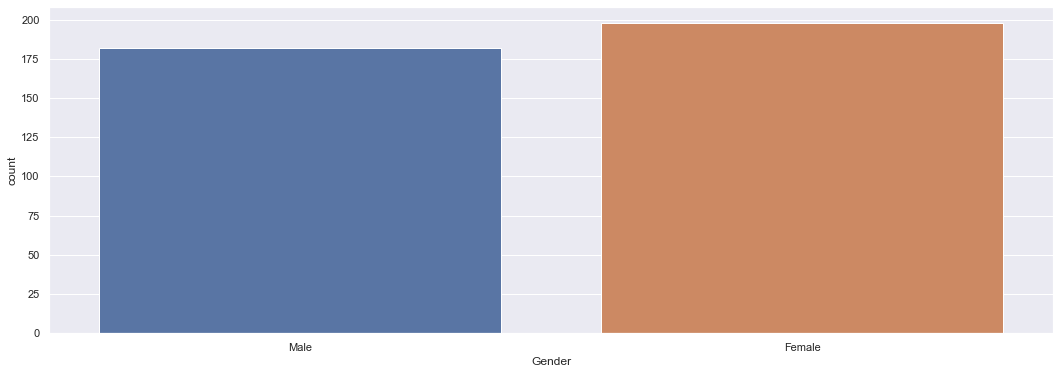

In [12]:
# Cek jumlah gender yang ada
plt.figure(figsize=(18,6))
sns.countplot(df['Gender'])
plt.show()

Dari grafik diatas dapat dilihat bahwa wanita mempunyai data tertinggi dibanding laki-laki walaupun tidak terlalu jauh perbedannya

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


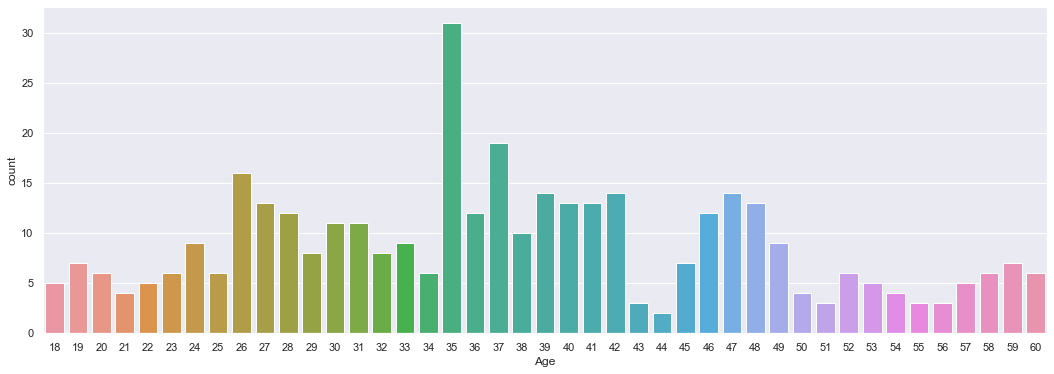

In [13]:
# Cek jumlah pengguna dari umur
plt.figure(figsize=(18,6))
sns.countplot(df['Age'])
plt.show()

Dari hasil diatas dapat dilihat bahwa setiap umur naik turun, namun ada yang bisa menjangkau paling tinggi di umur 35 tahun

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


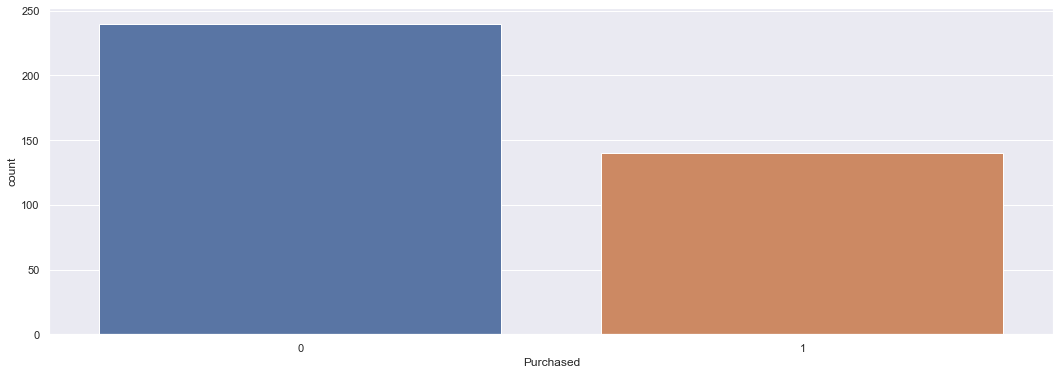

In [14]:
# Cek jumlah pengguna yang melakukan click on Ads atau tidak
plt.figure(figsize=(18,6))
sns.countplot(df['Purchased'])
plt.show()

Dari hasil diatas dapat dilihat bahwa ada ketimpangan dalam yang klik iklannya atau tidak sehingga data menjadi imbalanced dalam labelnya, untuk data processingnya nanti bisa dilakukan dengan cara Random Under Sampler, Random Over Sampler atau SMOTE

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


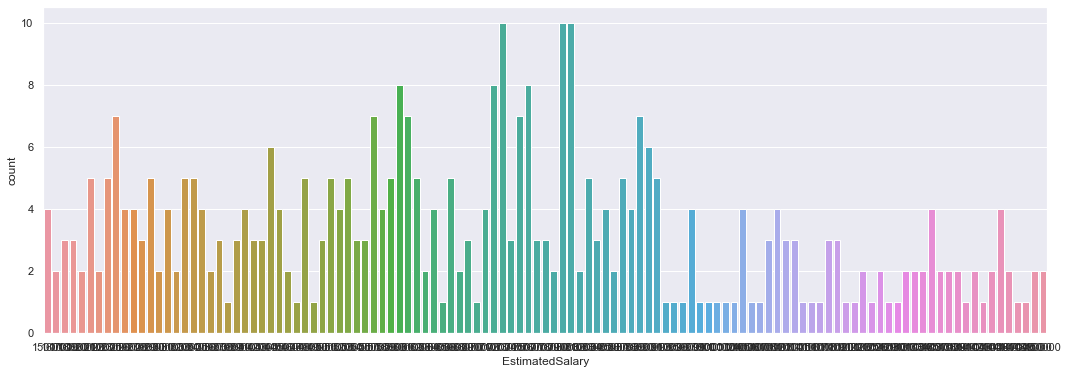

In [15]:
plt.figure(figsize=(18,6))
sns.countplot(df['EstimatedSalary'])
plt.show()

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

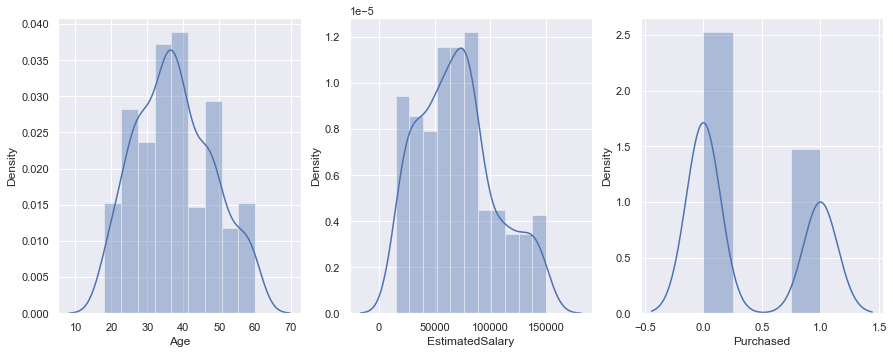

In [16]:
# Cek Distribusi Normal dari kolom numerik
numeric_col = ['Age', 'EstimatedSalary', 'Purchased']
plt.figure(figsize = (20, 25))
feature_num = 1
for i in numeric_col:
    if feature_num < 13:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

Dari hasil distribusi normal diatas dapat dilihat bahwa sudah cukup berdistribusi secara normal, kecuali yang kolom Purchased karena bernilai Binary Value

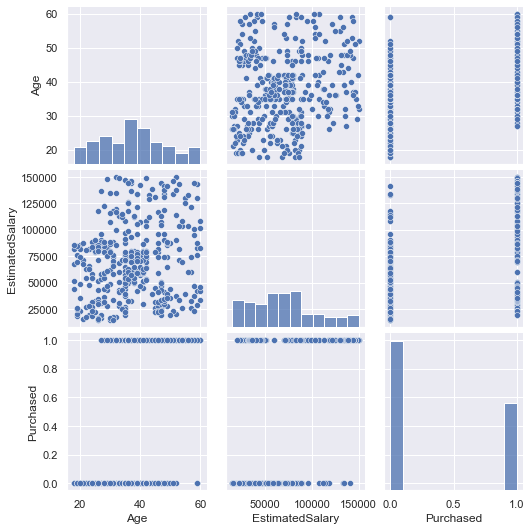

In [17]:
# Melihat persebaran data dari setiap kolom dataset
sns.pairplot(df)

Dari hasil pairplot diatas bisa kita lihat hubungan persebaran data yang erat antara Age dan Estimated Salary, tentunya dimana baik dari rentang umur minimum sampai maksimum mempunyai data persebaran yang luas.

In [18]:
# Merubah Gender menjadi biner, untuk Female = 0, untuk Male = 1
df['Gender'].replace(['Female', 'Male'],[0,1],inplace=True)

In [19]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


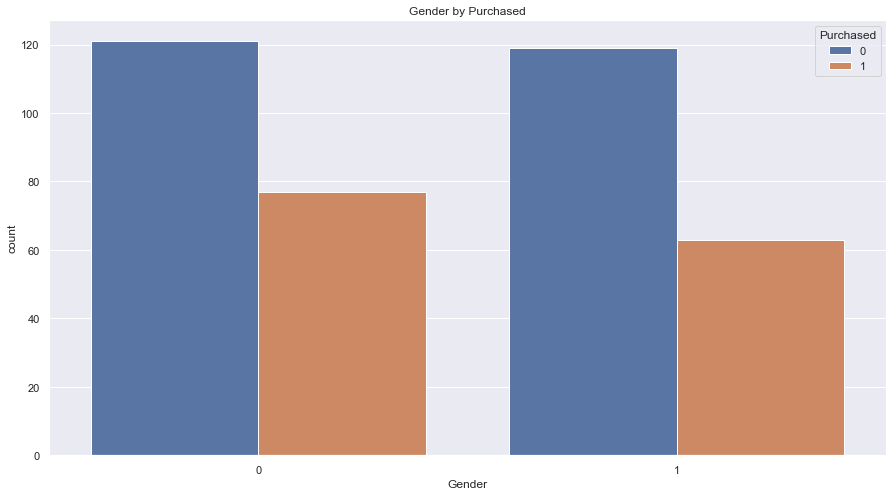

In [20]:
# Melihat hubungan antara gender dengan purchased
plt.figure(figsize=(15,8))
sns.countplot(x = 'Gender', hue= 'Purchased', data=df)
plt.title('Gender by Purchased')
plt.show()

Dari hasil countplot diatas, dapat dilihat bahwa untuk wanita yang lebih banyak dalam click on Ads daripada pria walau hasilnya tidak terlalu jauh

<Figure size 1080x576 with 0 Axes>

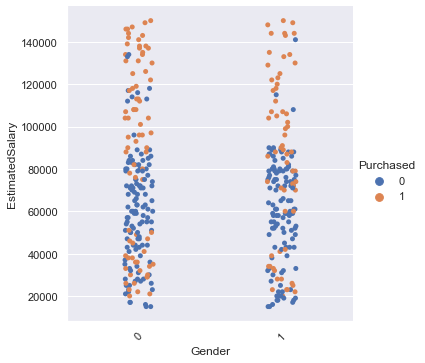

In [31]:
# Melihat hasil persebaran data dari Gender dan Salary
plt.figure(figsize=(15,8))
sns.catplot(x='Gender', y='EstimatedSalary', hue='Purchased', data=df)
plt.xticks(rotation=45)
plt.show()

Dari hasil catplot diatas dapat dilihat bahwa yang mempunyai Salary diatas 100000 yang lebih banyak akan click on Ads daripada yang dibawah 100000

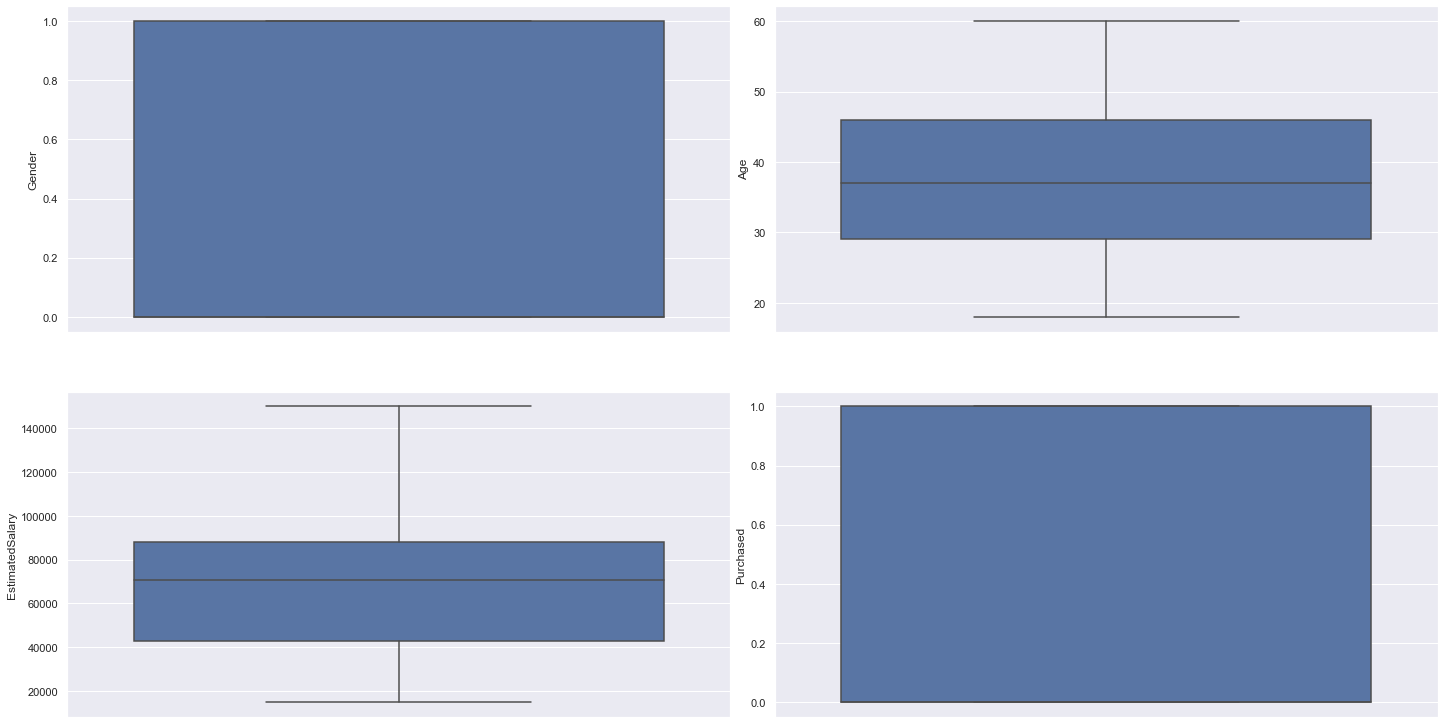

In [32]:
# Melihat apakah ada data Outlier
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Tidak ada Outlier dalam kolom Age dan Estimated Salary

<function matplotlib.pyplot.show(*args, **kw)>

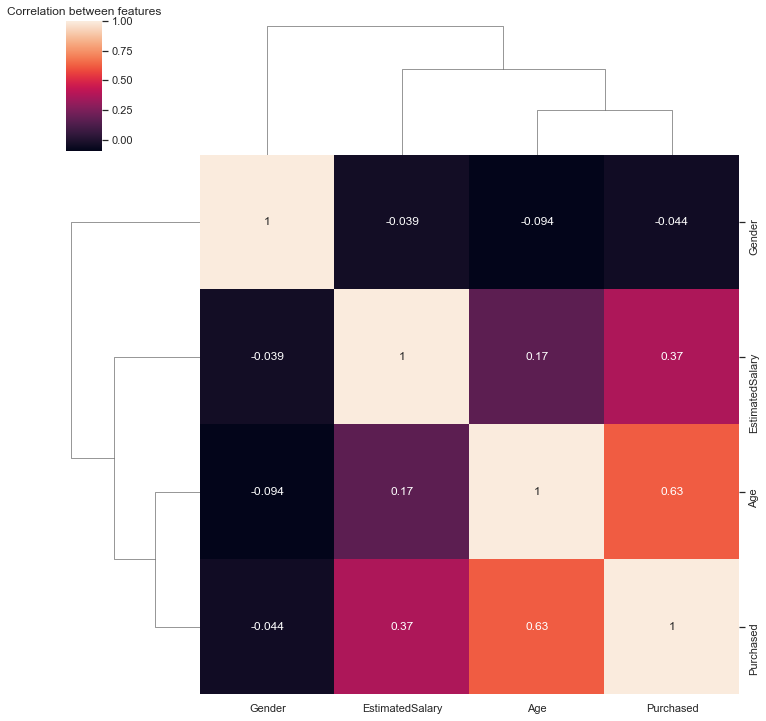

In [33]:
# Melihat korelasi antar kolom
corr_df = df.corr()
sns.clustermap(corr_df, annot=True)
plt.title('Correlation between features')
plt.show

Dapat dilihat diatas bahwa kolom Age dan Purchased mempunyai korelasi yang tinggi sebesar 0.63, disusul dengan Estimated Salary sebesar 0.37

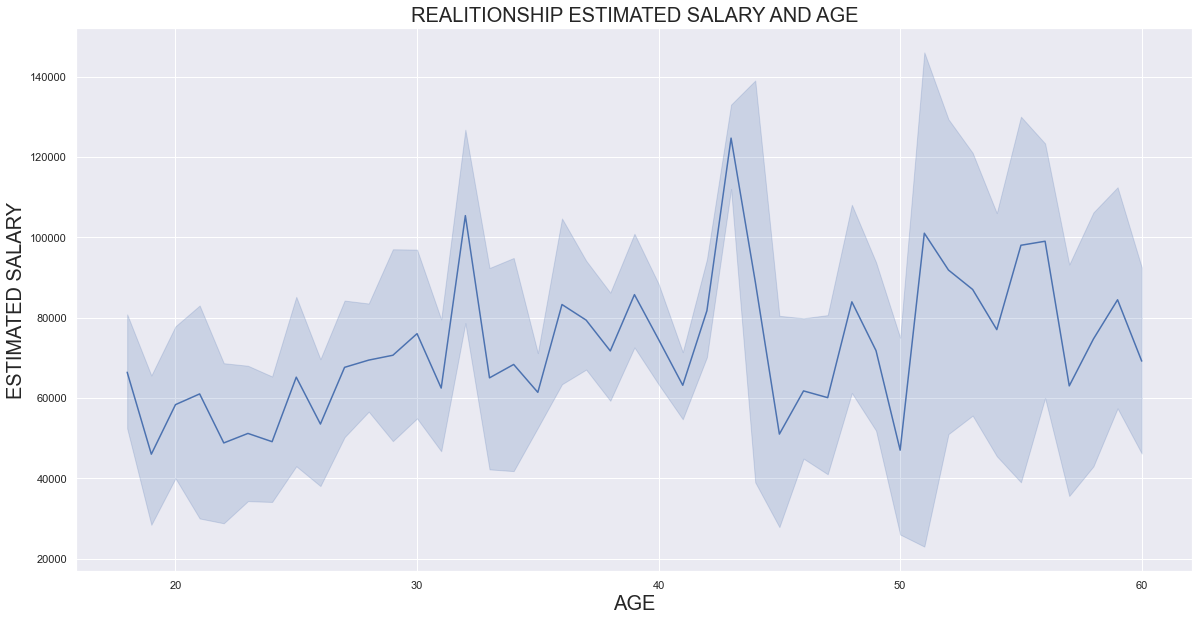

In [34]:
plt.figure(figsize=(20,10))
sns.lineplot(y="EstimatedSalary",x="Age",data=df)
plt.title("REALITIONSHIP ESTIMATED SALARY AND AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("ESTIMATED SALARY",fontsize=20)
plt.show()

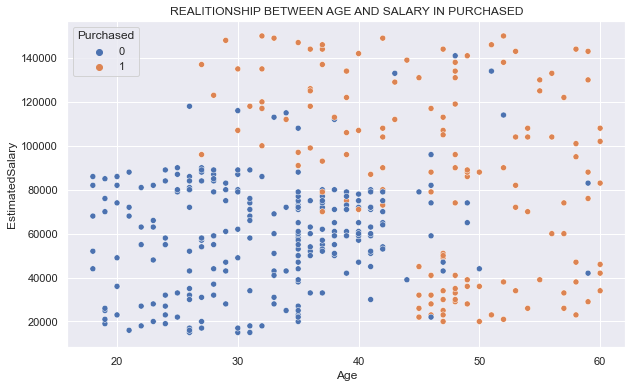

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(y="EstimatedSalary",x="Age",hue="Purchased",data=df)
plt.title("REALITIONSHIP BETWEEN AGE AND SALARY IN PURCHASED")
plt.show()

Dapat dilihat bahwa hubungan antara Age dan Estimated Salary dengan Purchased untuk umur yang diantara 30-60 dengan rate Salary diatas 100000 akan lebih mudah Click on Ads. Namun, yang diantara umur 40-60 dengan Salary 20000-40000 juga lebih banyak dalam Click on Ads.
Sehingga disarankan untuk lebih banyak menjangkau di umur 30-60 dengan rate Salary diatas 100000.

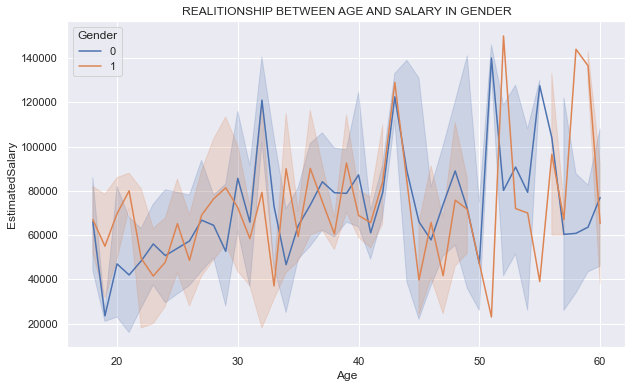

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Age",y="EstimatedSalary",hue="Gender",data=df)
plt.title("REALITIONSHIP BETWEEN AGE AND SALARY IN GENDER")
plt.show()

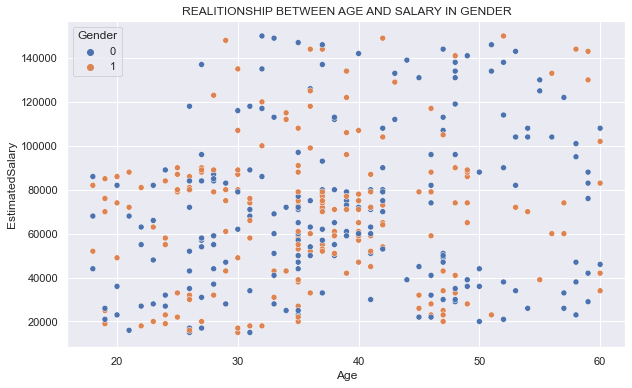

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age",y="EstimatedSalary",hue="Gender",data=df)
plt.title("REALITIONSHIP BETWEEN AGE AND SALARY IN GENDER")
plt.show()

## Data Pre-Processing

In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [49]:
X_train = pd.DataFrame(X_train)

In [50]:
X_test = pd.DataFrame(X_test)

In [51]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
print('before SMOTE:',Counter(y_train))
smote = SMOTE(sampling_strategy='minority')
X_train2, y_train2 = smote.fit_resample(X_train, y_train)
print('After SMOTE:',Counter(y_train2))

before SMOTE: Counter({0: 178, 1: 107})
After SMOTE: Counter({0: 178, 1: 178})


Counter({0: 240, 1: 140})


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


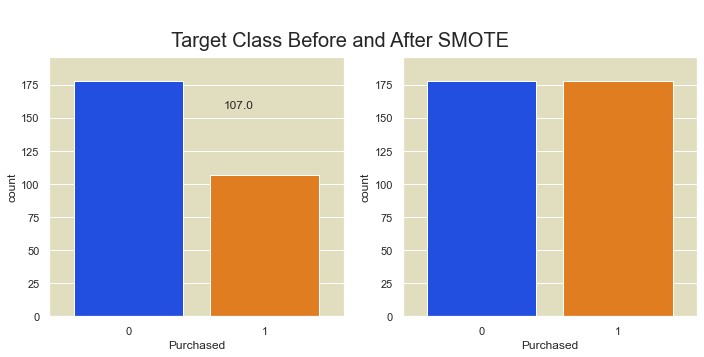

In [52]:
print(Counter(y))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After SMOTE', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y_train, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_train2, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

Dari beberapa model dibawah ini perlu kita ketahui bahwa dalam Click on Ads ini tentunya dari para pembuat iklan menginginkan lebih banyak yang Click on Ads daripada yang tidak, tentunya kita harus membuat model dengan nilai akurasi False Negative (Diprediksi akan tidak namun ternyata Pengguna Click on Ads) dan False Positive(Diprediksi akan Click on Ads namun tidak) harus paling tinggi. Hal ini dikarenakan agar mesin tidak salah prediksi dan iklan dapat berjalan dengan maksimal.

### XGBOOST Classifier

In [113]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=123)
model.fit(X_train2, y_train2)
y_train_hat = model.predict(X_train2)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train2, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.99      0.99      0.99       178

    accuracy                           0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356

Test performanc

In [114]:
from xgboost import XGBRFClassifier

xgb = XGBRFClassifier()
xgb_fit2 = XGBRFClassifier(random_state=42).fit(X_train2, y_train2)

pred_xgb2 = xgb_fit2.predict(X_test)

E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.84      0.90        62
           1       0.76      0.97      0.85        33

    accuracy                           0.88        95
   macro avg       0.87      0.90      0.88        95
weighted avg       0.90      0.88      0.89        95



E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


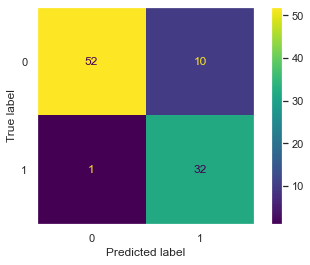

In [115]:
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
print(classification_report(y_test, pred_xgb2))

plot_confusion_matrix(estimator=xgb_fit2, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

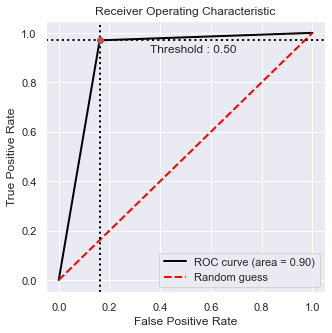

In [55]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred_xgb2, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
ypred_xgb_train = xgb_fit2.predict(X_train2)
modelxgb_acc=accuracy_score(pred_xgb2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(ypred_xgb_train,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(pred_xgb2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(pred_xgb2,y_test))
print("\nClassification Report:\n%s"%classification_report(pred_xgb2,y_test))

Train Set Accuracy:94.66292134831461
Test Set Accuracy:88.42105263157895

Confusion Matrix:
[[52  1]
 [10 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        53
           1       0.97      0.76      0.85        42

    accuracy                           0.88        95
   macro avg       0.90      0.87      0.88        95
weighted avg       0.90      0.88      0.88        95



E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Hasil dari XGBOOST Classifier ini sudah cukup baik karena False Negative sudah ditekan menjadi rendah, namun perlu dievaluasi di False Positive menjadi lebih rendah kembali. Hasil dari ROC Curve juga sudah cukup baik sebesar 0.91

In [57]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xgb_fit2.feature_importances_}).sort_values(by ='Score', 
                                                                                                   ascending = False)
features_importances.head()

,Features,Score
1,Age,0.576396
2,EstimatedSalary,0.383269
0,Gender,0.040334


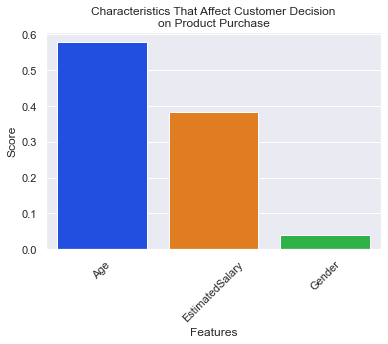

In [58]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [59]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [60]:
# models
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()

In [61]:
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train2, y_train2)

In [62]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.98      0.81      0.88        62
           1       0.73      0.97      0.83        33

    accuracy                           0.86        95
   macro avg       0.85      0.89      0.86        95
weighted avg       0.89      0.86      0.87        95



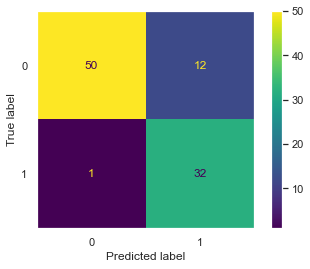

In [63]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

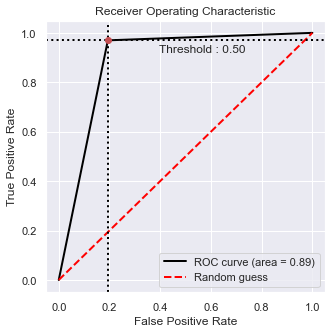

In [64]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [65]:
from sklearn.metrics import accuracy_score
ypred_rf_train = rf.predict(X_train2)
modelrf_acc=accuracy_score(ypred_rf,y_test)

print("Train Set Accuracy:"+str(accuracy_score(ypred_rf_train,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(ypred_rf,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(ypred_rf,y_test))
print("\nClassification Report:\n%s"%classification_report(ypred_rf,y_test))

Train Set Accuracy:99.71910112359551
Test Set Accuracy:86.31578947368422

Confusion Matrix:
[[50  1]
 [12 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88        51
           1       0.97      0.73      0.83        44

    accuracy                           0.86        95
   macro avg       0.89      0.85      0.86        95
weighted avg       0.88      0.86      0.86        95



Hasil dari Random Forest Classifier ini tentunya juga sudah cukup baik karena bisa menekan False Negative menjadi rendah, namun untuk False Positive masih lebih tinggi dari XGBOOST. Hasil dari ROC Curve juga sudah lumayan dengan hasil 0.89

In [66]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
1,Age,0.525813
2,EstimatedSalary,0.459262
0,Gender,0.014925


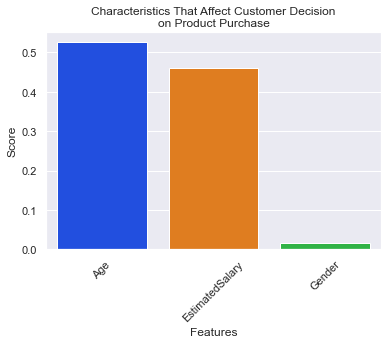

In [67]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

### Support Vector Classifier

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        62
           1       0.75      0.55      0.63        33

    accuracy                           0.78        95
   macro avg       0.77      0.72      0.74        95
weighted avg       0.78      0.78      0.77        95



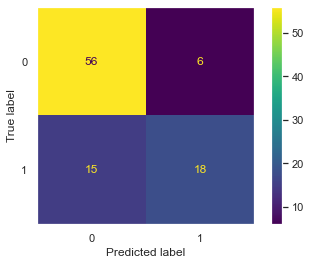

In [68]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

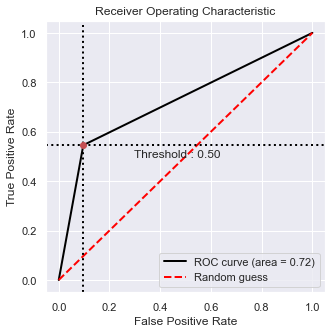

In [69]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [70]:
from sklearn.metrics import accuracy_score
ypred_svm_train = svm.predict(X_train2)
modelsvm_acc=accuracy_score(ypred_svm,y_test)

print("Train Set Accuracy:"+str(accuracy_score(ypred_svm_train,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(ypred_svm,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(ypred_svm,y_test))
print("\nClassification Report:\n%s"%classification_report(ypred_svm,y_test))

Train Set Accuracy:72.19101123595506
Test Set Accuracy:77.89473684210526

Confusion Matrix:
[[56 15]
 [ 6 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        71
           1       0.55      0.75      0.63        24

    accuracy                           0.78        95
   macro avg       0.72      0.77      0.74        95
weighted avg       0.81      0.78      0.79        95



Hasil dari Support Vector Classifier ini dalam False Positive sudah lebih baik daripada lainnya, namun untuk False Negative nya masih lebih rendah daripada lainnya. Hasil ROC Curve nya juga sebesar 0.72 membuktikan model masih kurang baik.

### Logistic Regression

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        62
           1       0.67      0.91      0.77        33

    accuracy                           0.81        95
   macro avg       0.80      0.83      0.80        95
weighted avg       0.85      0.81      0.81        95



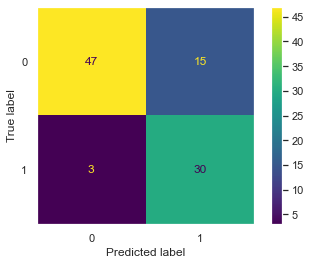

In [71]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

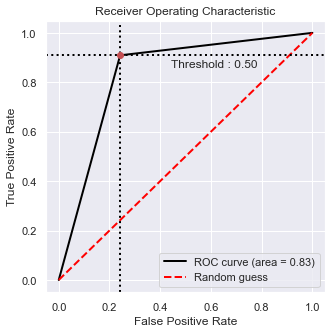

In [72]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [73]:
from sklearn.metrics import accuracy_score
ypred_lr_train = lr.predict(X_train2)
modellr_acc=accuracy_score(ypred_lr,y_test)

print("Train Set Accuracy:"+str(accuracy_score(ypred_lr_train,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(ypred_lr,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(ypred_lr,y_test))
print("\nClassification Report:\n%s"%classification_report(ypred_lr,y_test))

Train Set Accuracy:87.64044943820225
Test Set Accuracy:81.05263157894737

Confusion Matrix:
[[47  3]
 [15 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        50
           1       0.91      0.67      0.77        45

    accuracy                           0.81        95
   macro avg       0.83      0.80      0.80        95
weighted avg       0.83      0.81      0.81        95



Hasil dari model Logistic Regression ini untuk False Negative juga cukup baik karena bisa menekan rendah, namun untuk False Positive nya masih tinggi. Hasil ROC Curve nya juga sebesar 0.83

### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        62
           1       0.65      0.79      0.71        33

    accuracy                           0.78        95
   macro avg       0.76      0.78      0.77        95
weighted avg       0.80      0.78      0.78        95



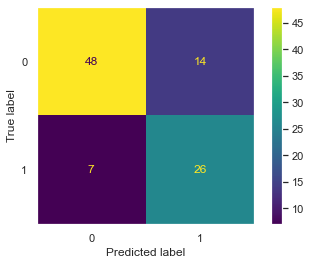

In [86]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

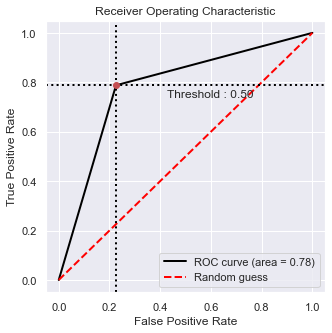

In [76]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_dt, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [77]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train2.columns, 'Score':dt.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
1,Age,0.526992
2,EstimatedSalary,0.453094
0,Gender,0.019914


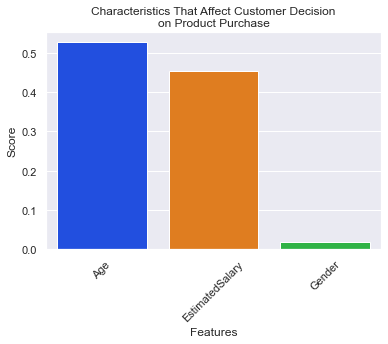

In [78]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [79]:
from sklearn.metrics import accuracy_score
ypred_dt_train = dt.predict(X_train2)
modeldt_acc=accuracy_score(ypred_dt,y_test)

print("Train Set Accuracy:"+str(accuracy_score(ypred_dt_train,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(ypred_dt,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(ypred_dt,y_test))
print("\nClassification Report:\n%s"%classification_report(ypred_dt,y_test))

Train Set Accuracy:99.71910112359551
Test Set Accuracy:77.89473684210526

Confusion Matrix:
[[48  7]
 [14 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        55
           1       0.79      0.65      0.71        40

    accuracy                           0.78        95
   macro avg       0.78      0.76      0.77        95
weighted avg       0.78      0.78      0.77        95



Hasil dari model Decision Tree ini untuk False Negative dan False Positive masih belum baik daripada yang lainnya. Hasil ROC Curve nya juga sebesar 0.78

### KNN

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        62
           1       0.62      0.70      0.66        33

    accuracy                           0.75        95
   macro avg       0.72      0.74      0.73        95
weighted avg       0.76      0.75      0.75        95



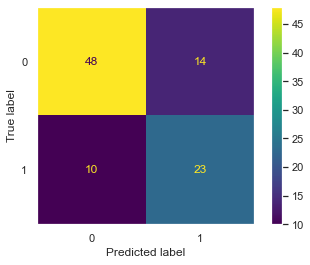

In [80]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

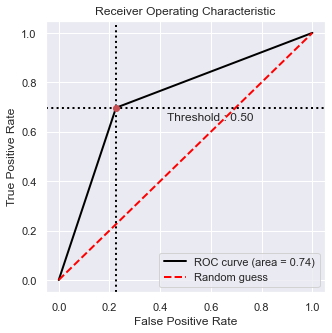

In [81]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_knn, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [82]:
from sklearn.metrics import accuracy_score
ypred_knn_train = knn.predict(X_train2)
modelknn_acc=accuracy_score(ypred_knn,y_test)

print("Train Set Accuracy:"+str(accuracy_score(ypred_knn_train,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(ypred_knn,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(ypred_knn,y_test))
print("\nClassification Report:\n%s"%classification_report(ypred_knn,y_test))

Train Set Accuracy:83.98876404494382
Test Set Accuracy:74.73684210526315

Confusion Matrix:
[[48 10]
 [14 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        58
           1       0.70      0.62      0.66        37

    accuracy                           0.75        95
   macro avg       0.74      0.72      0.73        95
weighted avg       0.74      0.75      0.74        95



Hasil dari model KNN ini untuk False Negative dan False Positive masih belum baik daripada yang lainnya. Hasil ROC Curve nya juga sebesar 0.74

### Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        62
           1       0.73      1.00      0.85        33

    accuracy                           0.87        95
   macro avg       0.87      0.90      0.87        95
weighted avg       0.91      0.87      0.88        95



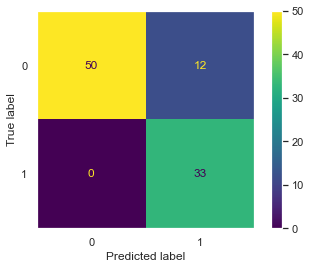

In [83]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

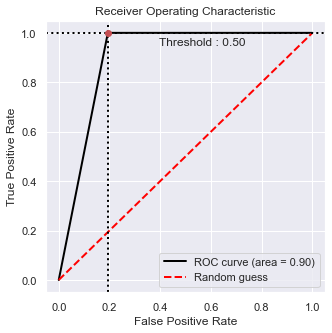

In [84]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_nb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [85]:
from sklearn.metrics import accuracy_score
ypred_nb_train = knn.predict(X_train2)
modelnb_acc=accuracy_score(ypred_nb,y_test)

print("Train Set Accuracy:"+str(accuracy_score(ypred_nb_train,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(ypred_nb,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(ypred_nb,y_test))
print("\nClassification Report:\n%s"%classification_report(ypred_nb,y_test))

Train Set Accuracy:83.98876404494382
Test Set Accuracy:87.36842105263159

Confusion Matrix:
[[50  0]
 [12 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        50
           1       1.00      0.73      0.85        45

    accuracy                           0.87        95
   macro avg       0.90      0.87      0.87        95
weighted avg       0.90      0.87      0.87        95



Hasil dari model Naive Bayes ini untuk False Negative dapat menekan sampai angka 0 membuktikan hasil nya paling baik, namun untuk False Positive masih cukup tinggi. Hasil ROC Curve nya juga tinggi sebesar 0.90

### Hasil Modelling
Dari berbagai macam modelling terdapat 3 modelling yang terbaik yaitu :
1) Naive Bayes

2) XGBOOST Classifier

3) Random Forest Classifier


## Hyperparameter Tuning

Untuk selanjutnya, akan dicoba hyperparameter tuning untuk bisa meningkatkan akurasi modelling

In [90]:
df_param['best_params'][1]

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 31, 'n_jobs': -1}

In [106]:
model2 = RandomForestClassifier(criterion= 'entropy', max_leaf_nodes= 4, min_samples_leaf= 5, min_samples_split= 4, n_estimators= 100)

In [107]:
model2.fit(X_train2, y_train2)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=4,
                       min_samples_leaf=5, min_samples_split=4)

In [108]:
y_test_pred_model2 = model2.predict(X_test)
y_train_pred_model2 =model2.predict(X_train2)

from sklearn.metrics import accuracy_score
modelsvc_acc = accuracy_score(y_test_pred_model2,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model2,y_train2)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model2,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model2,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model2,y_test))

Train Set Accuracy:93.25842696629213
Test Set Accuracy:88.42105263157895

Confusion Matrix:
[[52  1]
 [10 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        53
           1       0.97      0.76      0.85        42

    accuracy                           0.88        95
   macro avg       0.90      0.87      0.88        95
weighted avg       0.90      0.88      0.88        95



              precision    recall  f1-score   support

           0       0.98      0.84      0.90        62
           1       0.76      0.97      0.85        33

    accuracy                           0.88        95
   macro avg       0.87      0.90      0.88        95
weighted avg       0.90      0.88      0.89        95



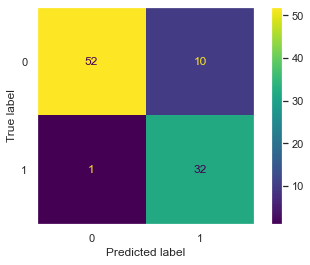

In [109]:
print(classification_report(y_test, y_test_pred_model2))
plot_confusion_matrix(estimator=model2, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

              precision    recall  f1-score   support

           0       0.98      0.81      0.88        62
           1       0.73      0.97      0.83        33

    accuracy                           0.86        95
   macro avg       0.85      0.89      0.86        95
weighted avg       0.89      0.86      0.87        95



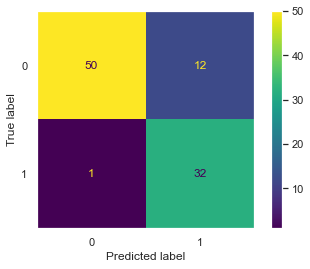

In [110]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

In [104]:
from sklearn.model_selection import GridSearchCV, KFold
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs1 = GridSearchCV(RandomForestClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train2, y_train2)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.94785013 0.94144651 0.94582277
 0.94607306 0.94321443 0.94595932 0.94518617 0.94409468 0.9462886
        nan        nan        nan 0.93869814 0.94746508 0.94350106
 0.94636477 0.946783   0.94816202 0.94757255 0.94302618 0.94745
        nan        nan        nan 0.94945987 0.94629982 0.94746084
 0.94001164 0.94627432 0.94324781 0.94039843 0.94548849 0.94812987
        nan        nan        nan 0.94318978 0.94271768 0.94660874
 0.94741436 0.94757896 0.94502926 0.94259641 0.94474895 0.9451208
        nan        nan        nan 0.94374404 0.94740607 0.94817474
 0.94401624 0.94767332 0.94480556 0.94693171 0.94634196 0.94432573
        nan        nan        nan 0.9469696  0.94306365 0.94451077
 0.94627639 0.94617576 0.94567326 0.94686534 0.94570272 0.9460156
        nan        nan        nan 0.94567863 0.94633927 0.94506687
 0.94

Best score: 0.9519597954690716
Best score: {'criterion': 'entropy', 'max_leaf_nodes': 4, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}


In [116]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train2, y_train2)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.95089856 0.95098811 0.94390266 ...        nan        nan        nan]
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best score: 0.9582395325106923
Best score: {'base_score': 0.5, 'booster': 'gbtree', 'gamma': 1, 'learning_rate': 0.1, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1}


In [117]:
from xgboost import XGBClassifier

model3 = XGBClassifier(base_score = 0.5, booster = 'gbtree', gamma = 1, learning_rate = 0.1, 
                       n_estimators = 100, reg_alpha = 1, reg_lambda = 1, random_state=123)
model3.fit(X_train2, y_train2)
y_train_hat2 = model3.predict(X_train2)
y_test_hat2 = model3.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train2, y_train_hat2))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat2))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat2))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat2))

[11:48:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-------------------------------------------------------
              precision    recal

E:\Anaconda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Kesimpulan Akhir
Berdasarkan hasil hyperparameter tuning yang dilakukan untuk **Random Forest Classifier** dan juga **XGBOOST Classifier** menunjukkan tidak ada hasil signifikan dalam meningkatkan untuk menekan False Negative dan False Positive, terutama dalam False Positive. Tentunya model yang bisa dipakai dalam prediksi Social Ads Click Classification ini bisa dipakai menggunakan :
#### XGBOOST Classifier